****
### Import libraries
****

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

****
### Data Exploration
****

#### Data Cleaning

In [16]:
df_base = pd.read_csv("../data/Base.csv")
df_base.head().T

,0,1,2,3,4
fraud_bool,0,0,0,0,0
income,0.3,0.8,0.8,0.6,0.9
name_email_similarity,0.986506,0.617426,0.996707,0.4751,0.842307
prev_address_months_count,-1,-1,9,11,-1
current_address_months_count,25,89,14,14,29
customer_age,40,20,40,30,40
days_since_request,0.006735,0.010095,0.012316,0.006991,5.742626
intended_balcon_amount,102.453711,-0.849551,-1.490386,-1.863101,47.152498
payment_type,AA,AD,AB,AB,AA
zip_count_4w,1059,1658,1095,3483,2339


In [15]:
# The dataset is free on Nans
df_base.isnull().any().any()

np.False_

In [45]:
#Desciption of categorical variables
df_base.describe(include=["object", "bool"]).T

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [10]:
#Desciption of numerical features
df_base.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [42]:
# device_fraud_count is only 0
df_base = df_base.drop(['device_fraud_count'], axis=1, errors='ignore') 

In [46]:
df_base.to_csv("../data/train_df.csv")

#### Data Analysis

In [43]:
# Target feature proportion
df_base['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

As explained in the dataset description, the target data are heavily imbalanced. A predictor that always outputs 0 has a 98.9% accuracy. Therefore, the accuracy is not a proper metric to measure the performace of the model. Instead, the authors of the dataset suggest to use the the True Positive Rate (TPR) (Accurately preciting a fraud) and the False Positive Rate (FPR) (predicting a fraud whereas the client is clean). The goal is then to maximise the TPR to guarantee a proper precision of the model, while minimising the FPR to guarantee the fairness towards legitimate clients. 

As a result, a proper evaluation metric is the ROC curve and it's area. 

In [54]:
# When looking at the description of numerical data, it appears that quite a lot of them have negative values whereas they shoudn't. Those are count features that are set to -1.
# We count the poportion

missing_vals = {}
missing_features = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

for f in missing_features: 
    missing_vals[f] = [len(df_base[df_base.fraud_bool == 1].query(f"{f} == -1")) /  len(df_base[df_base.fraud_bool == 1]),
                       len(df_base[df_base.fraud_bool == 0].query(f"{f} == -1")) /  len(df_base[df_base.fraud_bool == 0])]

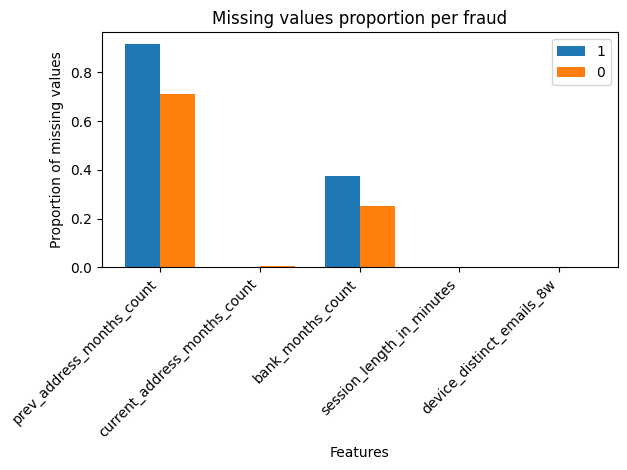

In [69]:
values = np.array(list(missing_vals.values()))
values1 = values[:, 0]
values2 = values[:, 1]

x = np.arange(len(missing_features))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, values1, width, label='1')
bar2 = ax.bar(x + width/2, values2, width, label='0')

ax.set_xlabel('Features')
ax.set_ylabel('Proportion of missing values')
ax.set_title('Missing values proportion per fraud')
ax.set_xticks(x)
ax.set_xticklabels(missing_features, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

It appears that the distribution of missing values is correlated with the fraud_bool for certain features. Therefore, we can say that the missing values themselves hold information, and It could be wise to keep them. We let the dataset like that as replaceing missing values with -1 when the feature should be positive is one valid way to identify them. 

#### Distribution per fraud status

In [66]:
# numerical features that have more than 10 different values
num_feat = [x for x in df_base.columns if df_base[x].nunique() >= 10]
print(num_feat)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


C:\Users\kruu\AppData\Local\Temp\ipykernel_14960\1676972784.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\kruu\AppData\Local\Temp\ipykernel_14960\1676972784.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\kruu\AppData\Local\Temp\ipykernel_14960\1676972784.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\kruu\AppData\Local\Temp\ipykernel_14960\1676972784.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\kruu\AppData\Local\Temp\ipykernel_14960\1676972784.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\kruu\A

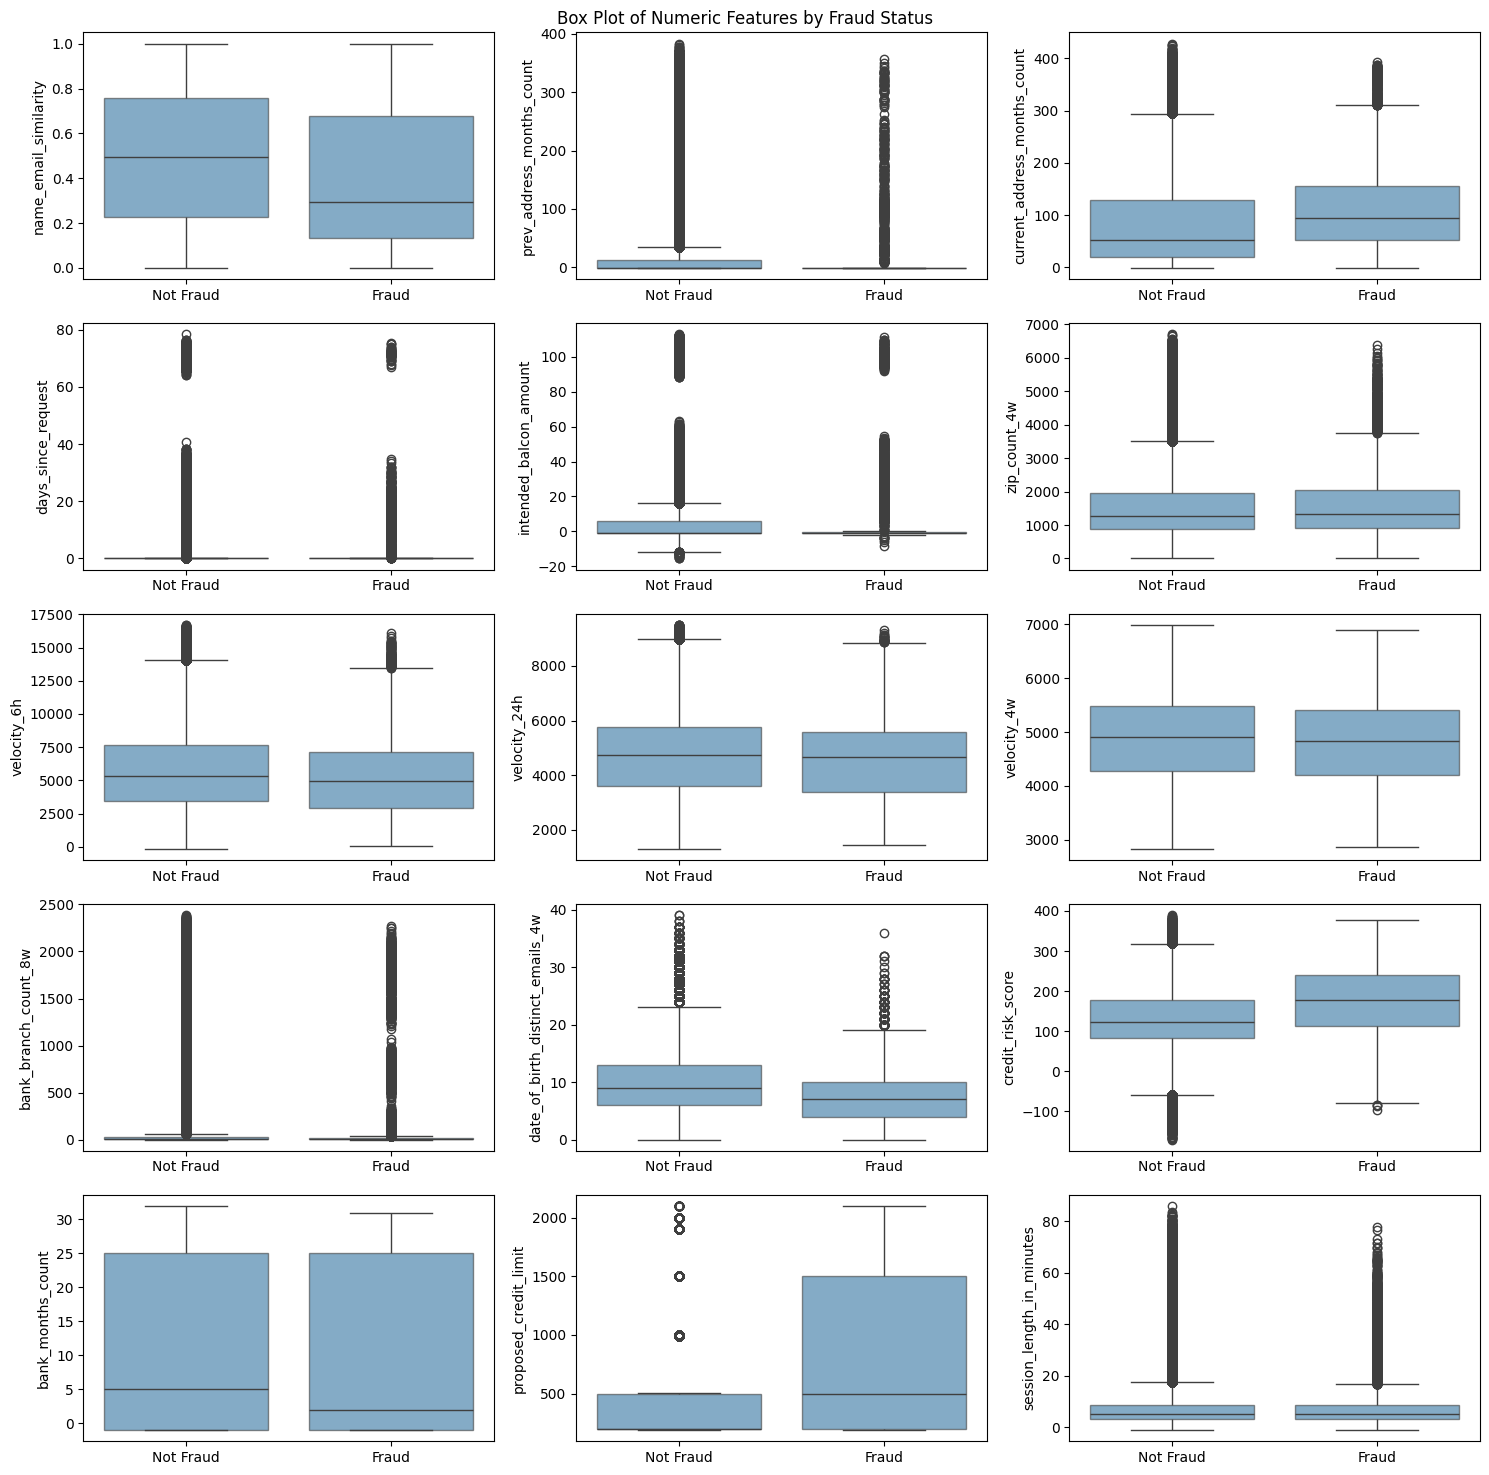

In [70]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(num_feat):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df_base, x='fraud_bool', y=feature, ax=ax, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


By looking at the conditional distribution of the numerical features w.r.t. the fraud status, it seems that it exists some correlations between the fraud status and some of those variables: 
- credit_risk_score
- name_email_similarity
- current_address_months_count

Those plots only allows us to get an intuition about the distributions. To confirm the differences between the samples Fraud/not Fraud, we have to perfrom statistical tests in order to assess the statistical relevance of the hypothesis. For instance, we can do a simple student test to assess the differences in the means or variances. We can also preform a 2-samples Kolmogorov-Smirnov test to assess the samples fraud/not fraud are following the same law of probability. 

We can also see that there are wuite a significant amount of outliers for some features (or at least, points that are located in the tails of the distributions). We cannot really remove them as they can contain significant information about the rare event "fraud" (just like the collision between aircraft).

As a result, we see that the dataset is clean and already processed for modelling. We showed as well that we suppose there are some correlations between some variables and the fraud status, which is a good starting point when trying to predict it. 